# ĐỒ ÁN MÔN HỌC HỆ HỖ TRỢ QUYẾT ĐỊNH

## Import package và libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
import time
from datetime import timedelta
import sklearn.metrics as metrics

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('MFG10YearTerminationData.csv')
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


In [3]:
# Data types
df.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

In [4]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [5]:
df.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


### Đánh giá tổng quan về dữ liệu
1. Dữ liệu là sự kết hợp của các giá trị chuỗi và số nguyên.
2. Các cột recorddate_key, birthdate_key, orighiredate_key, terminationdate_key nên đổi từ kiểu chuỗi thành kiểu date time.
3. Tuổi có thể tính bằng cách sử dụng ngày ghi(recorddate_key) và ngày sinh(birthdate_key). Vì vậy có thể xóa cột age.
4. Thời lượng dịch vụ(length_of_service) có thể được tìm thấy bằng cách sử dụng ngày ghi(recorddate_key) và ngày thuê ban đầu(orighiredate_key). Vì vậy có thể bỏ cột length_of_service.
5. Ngày chấm dứt sử dụng sẽ đặt mặc định là 1/1/1900 nếu như nhân viên vẫn còn trong hợp đồng.
6. Tên cửa hàng(store_name) hiển thị dưới dạng số, mặc dù nó là một tính năng phân loại dữ liệu(nominal). Bản thân tên cửa hàng không có khả năng là nguyên nhân dẫn đến việc thôi việc.
7. Giới tính có 2 cột là gender_short và gender_full. Có thể loại bỏ 1 trong 2 cột.
8. Các cột ngày chấm dứt, lý do chấm dứt và loại chấm dứt là kết quả của việc chấm dứt hợp đồng của nhân viên vì vậy không nên sử dụng cho việc đánh giá mô hình.
9. Cột status_year lặp lại năm trong ngày ghi(recorddate_key).
10. Cột STATUS là cột dữ liệu để dự đoán vì vậy phải được chuyển đổi từ chuỗi sang số.

In [6]:
# Mô tả thông của các dữ liệu kiểu số
df.describe(include=['int64'])

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


In [7]:
# Mô tả thông của các dữ liệu kiểu chuỗi
df.describe(include=['O'])

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,city_name,department_name,job_title,gender_short,gender_full,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT
count,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653
unique,130,5342,4415,1055,40,21,47,2,2,4,3,2,2
top,12/31/2013 0:00,3/23/1973,9/25/2006,1/1/1900,Vancouver,Meats,Meat Cutter,F,Female,Not Applicable,Not Applicable,ACTIVE,STORES
freq,5215,40,50,42450,11211,10269,9984,25898,25898,48168,48168,48168,49068


In [8]:
#Cột BUSINESS_UNIT chỉ có 2 giá trị nên chúng ta có thể chuyển từ chuỗi sang kiểu Boolean.
df.BUSINESS_UNIT = df.BUSINESS_UNIT.map({'STORES':1, 'HEADOFFICE':0})

#### Các cột city_name, department_name và job_title có nhiều giá trị khác nhau. Chúng ta sẽ tiến hành phân loại cho 3 cột này.

#### Phân loại cho cột job_title

In [9]:
# Danh sách các giá trị của job_title
df.job_title.value_counts()

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Bakery Manager                      285
Meats Manager                       285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Auditor                              20
Systems Analyst                      20
Investment Analyst                   20
Compensation Analyst                 20
Corporate Lawyer                     17


In [10]:
# Có 47 công việc, ta có thể phân loại theo các chức vụ của công ty.
# Có 4 loại chức vụ: nhân viên, người quản lý, giám đốc điều hành, hội đồng quản trị.

employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

executive = ['Exec Assistant, Finance', 'Exec Assistant, Legal Counsel',
             'CHief Information Officer', 'CEO', 'Exec Assistant, Human Resources',
             'Exec Assistant, VP Stores']

board = ['VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance',
         'Director, Accounts Receivable', 'Director, Accounting',
         'Director, Employee Records', 'Director, Accounts Payable',
         'Director, HR Technology', 'Director, Investments',
         'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

In [11]:
# Kiểm tra tất cả các job_title đã được phân loại chưa 
total = len(employee) + len(manager) + len(executive) + len(board)
print('Total jobs categorised:', total, '/ 47')

Total jobs categorised: 47 / 47


In [12]:
# Tạo một cột job_title mới 
df['hierarchy_job'] = df.job_title

# Thay thế các giá trị trong cột thành kiểu số sắp xếp theo chức vụ từ nhỏ - lớn
df.hierarchy_job = df.hierarchy_job.replace(employee, 0)
df.hierarchy_job = df.hierarchy_job.replace(manager, 1)
df.hierarchy_job = df.hierarchy_job.replace(executive, 2)
df.hierarchy_job = df.hierarchy_job.replace(board, 3)

# Kiểm tra tất cả giá trị job_title đã được thay thế chưa
df.hierarchy_job.value_counts()

0    47739
1     1749
3      105
2       60
Name: hierarchy_job, dtype: int64

#### Phân loại cho cột department_name

In [13]:
# Danh sách các giá trị của department_name
df.department_name.value_counts()

Meats                     10269
Dairy                      8599
Produce                    8515
Bakery                     8381
Customer Service           7122
Processed Foods            5911
Store Management            271
Executive                   100
Recruitment                  72
HR Technology                64
Accounting                   59
Employee Records             44
Accounts Receiveable         39
Labor Relations              34
Accounts Payable             34
Training                     30
Compensation                 24
Audit                        24
Investment                   24
Information Technology       20
Legal                        17
Name: department_name, dtype: int64

In [14]:
# Có tổng cộng 21 phòng ban, các phòng ban có thể phân loại tùy theo việc họ phục vụ khách hàng hay công việc kinh doanh.
serve_cus = ['Meats', 'Dairy', 'Produce', 'Bakery', 'Customer Service', 'Processed Foods']

serve_bus = ['Store Management', 'Executive', 'Recruitment', 'HR Technology',
             'Accounting', 'Employee Records', 'Accounts Receiveable',
             'Accounts Payable', 'Labor Relations', 'Training', 'Compensation',
             'Audit', 'Investment', 'Information Technology', 'Legal']

In [15]:
# Kiểm tra tất cả các department_name đã được phân loại chưa 
total = len(serve_cus) + len(serve_bus) 
print('Total departments categorised:', total, '/ 21')

Total departments categorised: 21 / 21


In [16]:
# Tạo một cột department_name mới 
df['department_service'] = df.department_name

# Thay thế các giá trị trong cột thành đối tượng Service của phòng ban
df.department_service = df.department_service.replace(serve_cus, 'Customer')
df.department_service = df.department_service.replace(serve_bus, 'Business')

# Kiểm tra tất cả giá trị department_name đã được thay thế chưa
df.department_service.value_counts()

Customer    48797
Business      856
Name: department_service, dtype: int64

#### Phân loại cho cột city_name

In [17]:
# Danh sách các giá trị của city_name
df.city_name.value_counts()

Vancouver           11211
Victoria             4885
Nanaimo              3876
New Westminster      3211
Kelowna              2513
Burnaby              2067
Kamloops             2061
Prince George        2048
Cranbrook            1785
Surrey               1560
Richmond             1401
Terrace              1228
Chilliwack           1167
Trail                 925
Langley               901
Vernon                898
Squamish              806
Quesnel               703
Abbotsford            681
North Vancouver       648
Fort St John          621
Williams Lake         617
West Vancouver        613
Port Coquitlam        545
Aldergrove            520
Fort Nelson           322
Nelson                317
New Westminister      254
Grand Forks           236
White Rock            231
Haney                 182
Princeton             136
Dawson Creek          129
Bella Bella           126
Ocean Falls            65
Pitt Meadows           57
Cortes Island          43
Valemount              37
Dease Lake  

In [18]:
# Có tổng cộng 40 thành phố
# Ta có thể thấy đa số thành phố đều là của nước Canada
# Ta có thể phân loại các thành phố theo số lượng dân cư
# Dựa vào số liệu thống kê dân số Canada theo thành phố vào năm 2011 để gần với lần cập nhật gần nhất của dataset (2015)
# Link trang thống kê: https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/index.cfm?Lang=E
city_population_2011 =  {'Vancouver':2313328,
                         'Victoria':344615,
                         'Nanaimo':146574,
                         'New Westminster':65976,
                         'Kelowna':179839,
                         'Burnaby':223218,
                         'Kamloops':85678,
                         'Prince George':71974,
                         'Cranbrook':19319,
                         'Surrey':468251,
                         'Richmond':190473,
                         'Terrace':11486,
                         'Chilliwack':77936,
                         'Trail':7681,
                         'Langley':25081,
                         'Vernon':38180,
                         'Squamish':17479,
                         'Quesnel':10007,
                         'Abbotsford':133497,
                         'North Vancouver':48196,
                         'Fort St John':18609,
                         'Williams Lake':10832,
                         'West Vancouver':42694,
                         'Port Coquitlam':55985,
                         'Aldergrove':12083,
                         'Fort Nelson':3561,
                         'Nelson':10230,
                         'New Westminister':65976,
                         'Grand Forks':3985,
                         'White Rock':19339,
                         'Haney':76052,
                         'Princeton':2724,
                         'Dawson Creek':11583,
                         'Bella Bella':1095,
                         'Ocean Falls':129,
                         'Pitt Meadows':17736,
                         'Cortes Island':1007,
                         'Valemount':1020,
                         'Dease Lake':58,
                         'Blue River':215}

In [19]:
# Kiểm tra tất cả các city_name đã được phân loại chưa 
print('Cities in dictionary:', len(city_population_2011), 'out of 40')

Cities in dictionary: 40 out of 40


In [20]:
# Tạo một cột city_name mới 
df['population'] = df.city_name

# Ánh xạ các số lượng dân cư cho mỗi thành phố 
df.population = df.population.map(city_population_2011)

# Tạo một cột mới để phân loại các số lượng dân cư của mỗi thành phố
df['population_category'] = df.population

# Ta sẽ phân loại các số lượng dân cư theo vùng
# Dân số > 100,000 là City (vùng thành phố)
# Dân số từ 10,000 - 99,999 là Rural (vùng nông thôn) 
# Dân số < 10,000 là Remote (vùng hẻo lánh, xa xôi)
city_region = (df['population'] >= 100000)
rural_region = ((df['population'] < 100000) & (df['population'] >= 10000))
remote_region= (df['population'] < 10000)
df.loc[city_region, 'population_category'] = 'City'
df.loc[rural_region, 'population_category'] = 'Rural'
df.loc[remote_region, 'population_category'] = 'Remote'

In [21]:
# Kiểm tra tất cả các population đã được phân loại chưa 
df.population_category.value_counts()

City      28194
Rural     19542
Remote     1917
Name: population_category, dtype: int64

In [22]:
# Thay thế các giá trị trong cột thành kiểu số sắp xếp theo dân số từ nhỏ - lớn
df.population_category = df.population_category.replace('Remote', 0)
df.population_category = df.population_category.replace('Rural', 1)
df.population_category = df.population_category.replace('City', 2)

In [23]:
# Kiểm tra tất cả các population_category đã được thay thế chưa 
df.population_category.value_counts()

2    28194
1    19542
0     1917
Name: population_category, dtype: int64

#### Xử lý dữ liệu cho cột STATUS

In [24]:
# Chuyển cột STATUS từ kiểu chuỗi sang kiểu số
df.STATUS = df.STATUS.map({'ACTIVE':1, 'TERMINATED':0})

In [25]:
# Chia dữ liệu cột STATUS thành 2 cột khác nhau (out of company và in company)
out_company = df[df.STATUS == 0]
in_company = df[df.STATUS == 1]

#### Đánh giá tổng quan vấn đề ở lại hay rời đi của nhân viên dựa vào độ tuổi (age) và thời gian làm việc (length_of_service)

Text(0.5, 1.0, 'In company')

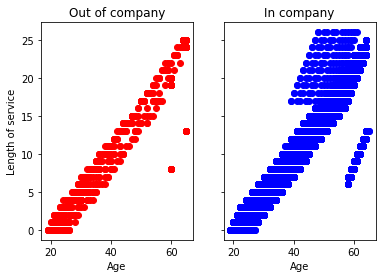

In [26]:
# Sử dụng mô hình Matplot
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

ax1.scatter(out_company.age, out_company.length_of_service, color='r')
ax1.set_xlabel('Age')
ax1.set_ylabel('Length of service')
ax1.set_title('Out of company')

ax2.scatter(in_company.age, in_company.length_of_service, color='b')
ax2.set_xlabel('Age')
ax2.set_title('In company')

#### Nhận xét biểu đồ
Nhân viên có thể rời công ty sau khi làm việc trong bất kỳ khoảng thời gian nào từ 0 đến 25 năm và mọi lứa tuổi từ 20 đến 60

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


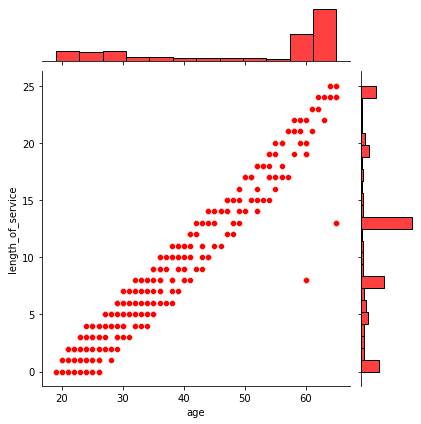

In [27]:
# Đánh giá kỹ hơn về vấn đề độ tuổi và thời gian làm lên việc chấm dứt hợp đồng của nhân viên
gr = sns.jointplot(out_company.age, out_company.length_of_service, color='r')

### Tổng quan về biểu đồ
Có 5 cột đỉnh về độ tuổi, 4 cột đỉnh về thời gian làm việc
1. Đỉnh tuổi lớn nhất: độ tuổi > 61 trùng với đỉnh cột thời gian làm việc khoảng 25 năm. Đây là những người sắp nghỉ hưu.
2. Đỉnh tuổi thứ hai: độ tuổi khoảng 58-61 tuổi trùng với cột thời gian làm việc là khoảng 19-21 năm. Đây cũng có thể là những người sắp nghỉ hưu.  
3. Đỉnh tuổi thứ ba: độ tuổi khoảng 19-24 tuổi trùng với đỉnh cột thời gian làm việc khoảng 0 năm. Đây có thể là những người đang thử việc để tìm kiếm thứ họ mong muốn. 
4. Đỉnh tuổi thứ tư: độ tuổi khoảng 25-27 tuổi trùng với cột thời gian làm việc khoảng 1-3 năm. Đây có thể là những người cảm thấy không phù hợp với công việc hoặc môi trường làm việc.
5. Đỉnh tuổi thứ năm: độ tuổi khoảng 28-31 tuổi trùng với đỉnh cột thời gian làm việc là 8 năm. Đây có thể là những người đã cảm thấy mệt mỏi với công việc của họ và muốn thay đổi nghề nghiệp. Cũng có thể là những người có những lí do gia đình buộc họ phải thay đổi.

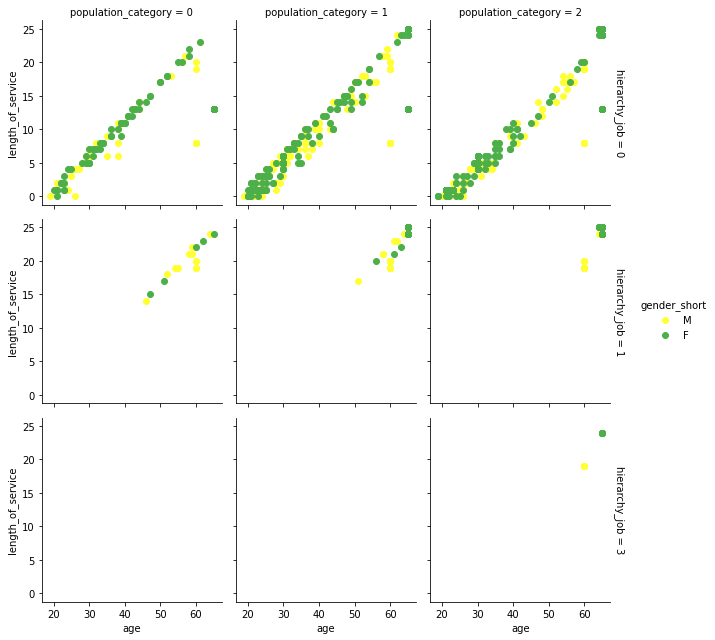

In [28]:
# Tổng quan về nơi làm việc, độ tuổi, thời gian làm việc, chức vụ cho từng giới tính của nhân viên chấm dứt hợp đồng
gr = sns.FacetGrid(out_company, col='population_category', row='hierarchy_job', palette='Set1_r', 
                   hue='gender_short', margin_titles=True)
gr = (gr.map(plt.scatter, 'age', 'length_of_service').add_legend())

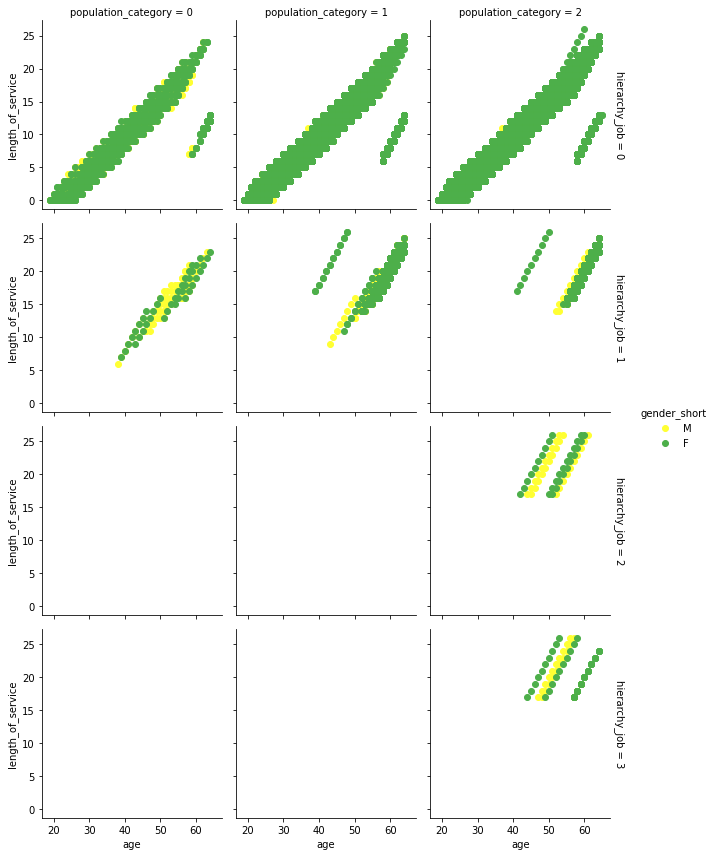

In [29]:
# Tổng quan về nơi làm việc, độ tuổi, thời gian làm việc, chức vụ cho từng giới tính của nhân viên còn hợp đồng
gr = sns.FacetGrid(in_company, col='population_category', row='hierarchy_job', palette='Set1_r', 
                   hue='gender_short', margin_titles=True)
gr = (gr.map(plt.scatter, 'age', 'length_of_service').add_legend())

### Nhận xét về 2 biểu đồ 
1. Không có nhân viên nào nghỉ viên khi họ đang làm ở chức vụ Giám đốc điều hành.
2. Giám đốc điều hành và thành viên hội đồng quản trị chỉ làm việc trong các thành phố.
3. Dường như không có sự khác biệt lớn trong việc chấm dứt việc làm giữa nam và nữ.
4. Các nhà quản lý và thành viên hội đồng quản trị chỉ ngừng việc sau ít nhất 14 năm phục vụ. Điều này có nghĩa là họ có khả năng đã được đề bạt nội bộ cho các vị trí đó.

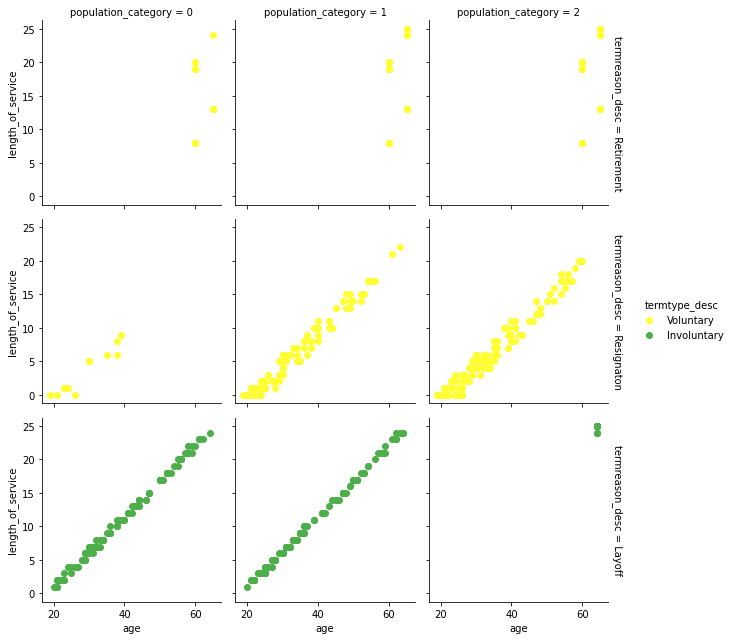

In [30]:
# Tổng quan về nơi làm việc, độ tuổi, thời gian làm việc, 
# lí do chấm dứt hợp đồng cho việc nhân viên đó có tự nguyện không khi chấm dứt hợp đồng
g = sns.FacetGrid(out_company, col='population_category', row='termreason_desc', palette='Set1_r', 
                  hue='termtype_desc', margin_titles=True)
g = (g.map(plt.scatter, 'age', 'length_of_service').add_legend())

### Nhận xét về biểu đồ
1. Việc sa thải xảy ra cho mọi lứa tuổi và tất cả các thời gian dịch vụ ở vùng xa xôi hẻo lánh và nông thôn. 
2. Từ chức là không phổ biến ở các vùng xa xôi. 
3. Đúng như dự đoán, sa thải là không tự nguyện, trong khi việc từ chức và nghỉ hưu là tự nguyện.

<AxesSubplot:>

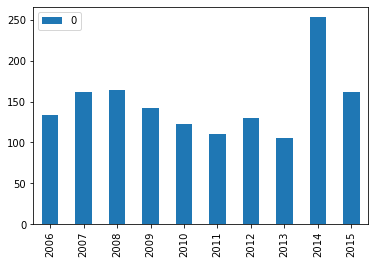

In [31]:
# Thống kê số lượng nhân viên chấm dứt hợp đồng mỗi năm
term_per_year = Counter(out_company.STATUS_YEAR)
term_per_year_df = pd.DataFrame.from_dict(term_per_year, orient='index')
term_per_year_df = term_per_year_df.sort_index()
term_per_year_df.plot(kind='bar')

### Nhận xét về biểu đồ
1. Năm 2014 có số lượng chấm dứt việc làm cao bất thường. 
2. Ngoài năm 2014 ra thì cột cao thứ hai là năm 2008, do năm 2008 xảy ra cuộc khủng hoảng kinh tế toàn cầu (GFC)
3. Năm 2015 nhiều tương tự như cột 2008, nhưng thấp hơn nhiều so với đỉnh 2014.

### Xóa các cột không cần thiết và các cột đã được phân loại

In [32]:
# Bỏ cột employee ID, record date, birth date, termination date, termination reason,
# termination type, gender_full, STATUS_YEAR, store_name
# Bỏ cột job_title (thay thế bằng cột hierarchy_job), department_name (thay thế bằng department_service), 
# city_name và population (thay thế bằng population_category)
drop_cols = ['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
             'terminationdate_key', 'gender_full', 'termreason_desc',
             'termtype_desc', 'STATUS_YEAR', 'store_name', 'job_title', 'department_name',
             'city_name', 'population']

df = df.drop(drop_cols, axis=1)

In [33]:
df

,age,length_of_service,gender_short,STATUS,BUSINESS_UNIT,hierarchy_job,department_service,population_category
0,52,17,M,1,0,2,Business,2
1,53,18,M,1,0,2,Business,2
2,54,19,M,1,0,2,Business,2
3,55,20,M,1,0,2,Business,2
4,56,21,M,1,0,2,Business,2
...,...,...,...,...,...,...,...,...
49648,21,2,M,0,1,0,Customer,0
49649,19,0,F,0,1,0,Customer,2
49650,21,2,F,0,1,0,Customer,1
49651,19,0,F,0,1,0,Customer,2


In [34]:
    # Các cột giới tính (Gender_short), bộ phận phục vụ(department_service) đang là cột thuộc tính định danh, phải được chuyển sang dạng só
dummy_cols = ['gender_short','department_service']
df = pd.get_dummies(df, columns=dummy_cols)

In [35]:
df

,age,length_of_service,STATUS,BUSINESS_UNIT,hierarchy_job,population_category,gender_short_F,gender_short_M,department_service_Business,department_service_Customer
0,52,17,1,0,2,2,0,1,1,0
1,53,18,1,0,2,2,0,1,1,0
2,54,19,1,0,2,2,0,1,1,0
3,55,20,1,0,2,2,0,1,1,0
4,56,21,1,0,2,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
49648,21,2,0,1,0,0,0,1,0,1
49649,19,0,0,1,0,2,1,0,0,1
49650,21,2,0,1,0,1,1,0,0,1
49651,19,0,0,1,0,2,1,0,0,1


In [36]:
# Tách cột thuộc tính quyết định ra 1 cột riêng
label = df.STATUS
df = df.drop('STATUS', axis=1)


In [37]:
# Tách dữ liệu train và test (dữ liệu train=70%, test=30%)
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3,random_state=10)

In [38]:
# Thực hiện thuật toán KNN
start_knn = time.time()
knc = KNeighborsClassifier()
knn_pred = knc.fit(X_train, y_train).predict(X_test)
knn_score = metrics.accuracy_score(y_test, knn_pred)
end_knn =time.time()
times_knn = timedelta(seconds=round(end_knn-start_knn,4)).total_seconds()
accuracy_knn = knn_score
print ('Time', times_knn)
print("Accuracy", accuracy_knn)
print("Report", metrics.classification_report(y_test, knn_pred))

Time 0.3598
Accuracy 0.9867749731471536
Report               precision    recall  f1-score   support

           0       0.96      0.58      0.72       441
           1       0.99      1.00      0.99     14455

    accuracy                           0.99     14896
   macro avg       0.97      0.79      0.86     14896
weighted avg       0.99      0.99      0.99     14896



Text(0.5, 1.0, 'K-Nearest Neighbors Accuracy Score : 0.9867749731471536')

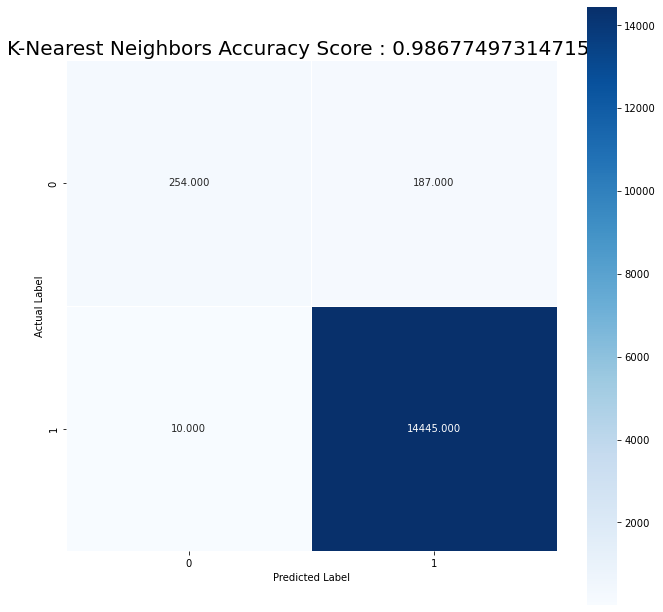

In [39]:
# Tiếp tục thực hiện thuật toán KNN
# Vẽ ma trận nhầm lẫn
knn_cm = metrics.confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(11,11))
ax = sns.heatmap(knn_cm, annot =True, fmt =".3f",linewidths = .5, square =True, cmap= 'Blues')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
title = 'K-Nearest Neighbors Accuracy Score : {0}'.format(knn_score)
plt.title(title, size =20)

In [40]:
# Thực hiện thuật toán Ramdom Forest

rfc = RandomForestClassifier()
start_rf =time.time()
rf_pred = rfc.fit(X_train, y_train).predict(X_test)
end_rf= time.time()
times_rf = timedelta(seconds=round(end_rf-start_rf,4)).total_seconds()
print ("time", times_rf)

rf_score = metrics.accuracy_score(y_test, rf_pred)
accuracy_rf = rf_score
print("Accuracy", accuracy_rf)
print("Report", metrics.classification_report(y_test, rf_pred))

time 1.0186
Accuracy 0.986640708915145
Report               precision    recall  f1-score   support

           0       0.94      0.59      0.72       441
           1       0.99      1.00      0.99     14455

    accuracy                           0.99     14896
   macro avg       0.96      0.79      0.86     14896
weighted avg       0.99      0.99      0.99     14896



Text(0.5, 1.0, 'Random Forest Accuracy Score : 0.986640708915145')

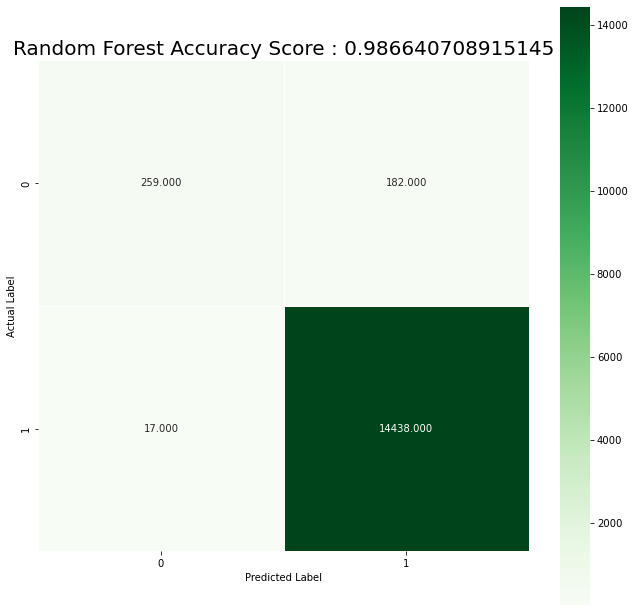

In [41]:
# Vẽ ma trận nhầm lẫn cho mô hình thuật toán Random Forest
rf_cm = metrics.confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(11,11))
ax =sns.heatmap(rf_cm, annot =True, fmt =".3f",linewidths = .5, square =True, cmap= 'Greens')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
title = 'Random Forest Accuracy Score : {0}'.format(rf_score)
plt.title(title, size =20)

In [42]:
# Thực hiện thuật toán Decision Trees (ID3)
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
start_tree = time.time()
id3_pred = clf.fit(X_train, y_train).predict(X_test)
end_tree = time.time()
times_tree_id3 = timedelta(seconds=round(end_tree - start_tree,4)).total_seconds()
print("Time decision tree (ID3)",times_tree_id3)
id3_score = metrics.accuracy_score(y_test, id3_pred)
accuracy_tree_id3 = id3_score
print("Accuracy",accuracy_tree_id3)
print("Report",metrics.classification_report(y_test,id3_pred))

Time decision tree (ID3) 0.0289
Accuracy 0.9857008592910849
Report               precision    recall  f1-score   support

           0       0.89      0.59      0.71       441
           1       0.99      1.00      0.99     14455

    accuracy                           0.99     14896
   macro avg       0.94      0.80      0.85     14896
weighted avg       0.98      0.99      0.98     14896



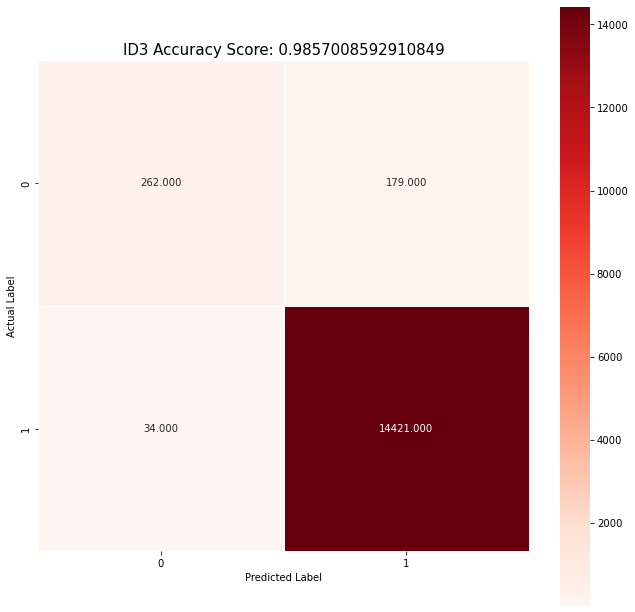

In [43]:
# Vẽ ma trận nhầm lẫn cho thuật toán Decision Tree (ID3)
id3_cm = metrics.confusion_matrix(y_test, id3_pred)
plt.figure(figsize=(11,11))
ax=sns.heatmap(id3_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Reds')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
title = 'ID3 Accuracy Score: {0}'.format(id3_score)
plt.title(title,size=15)
plt.show()

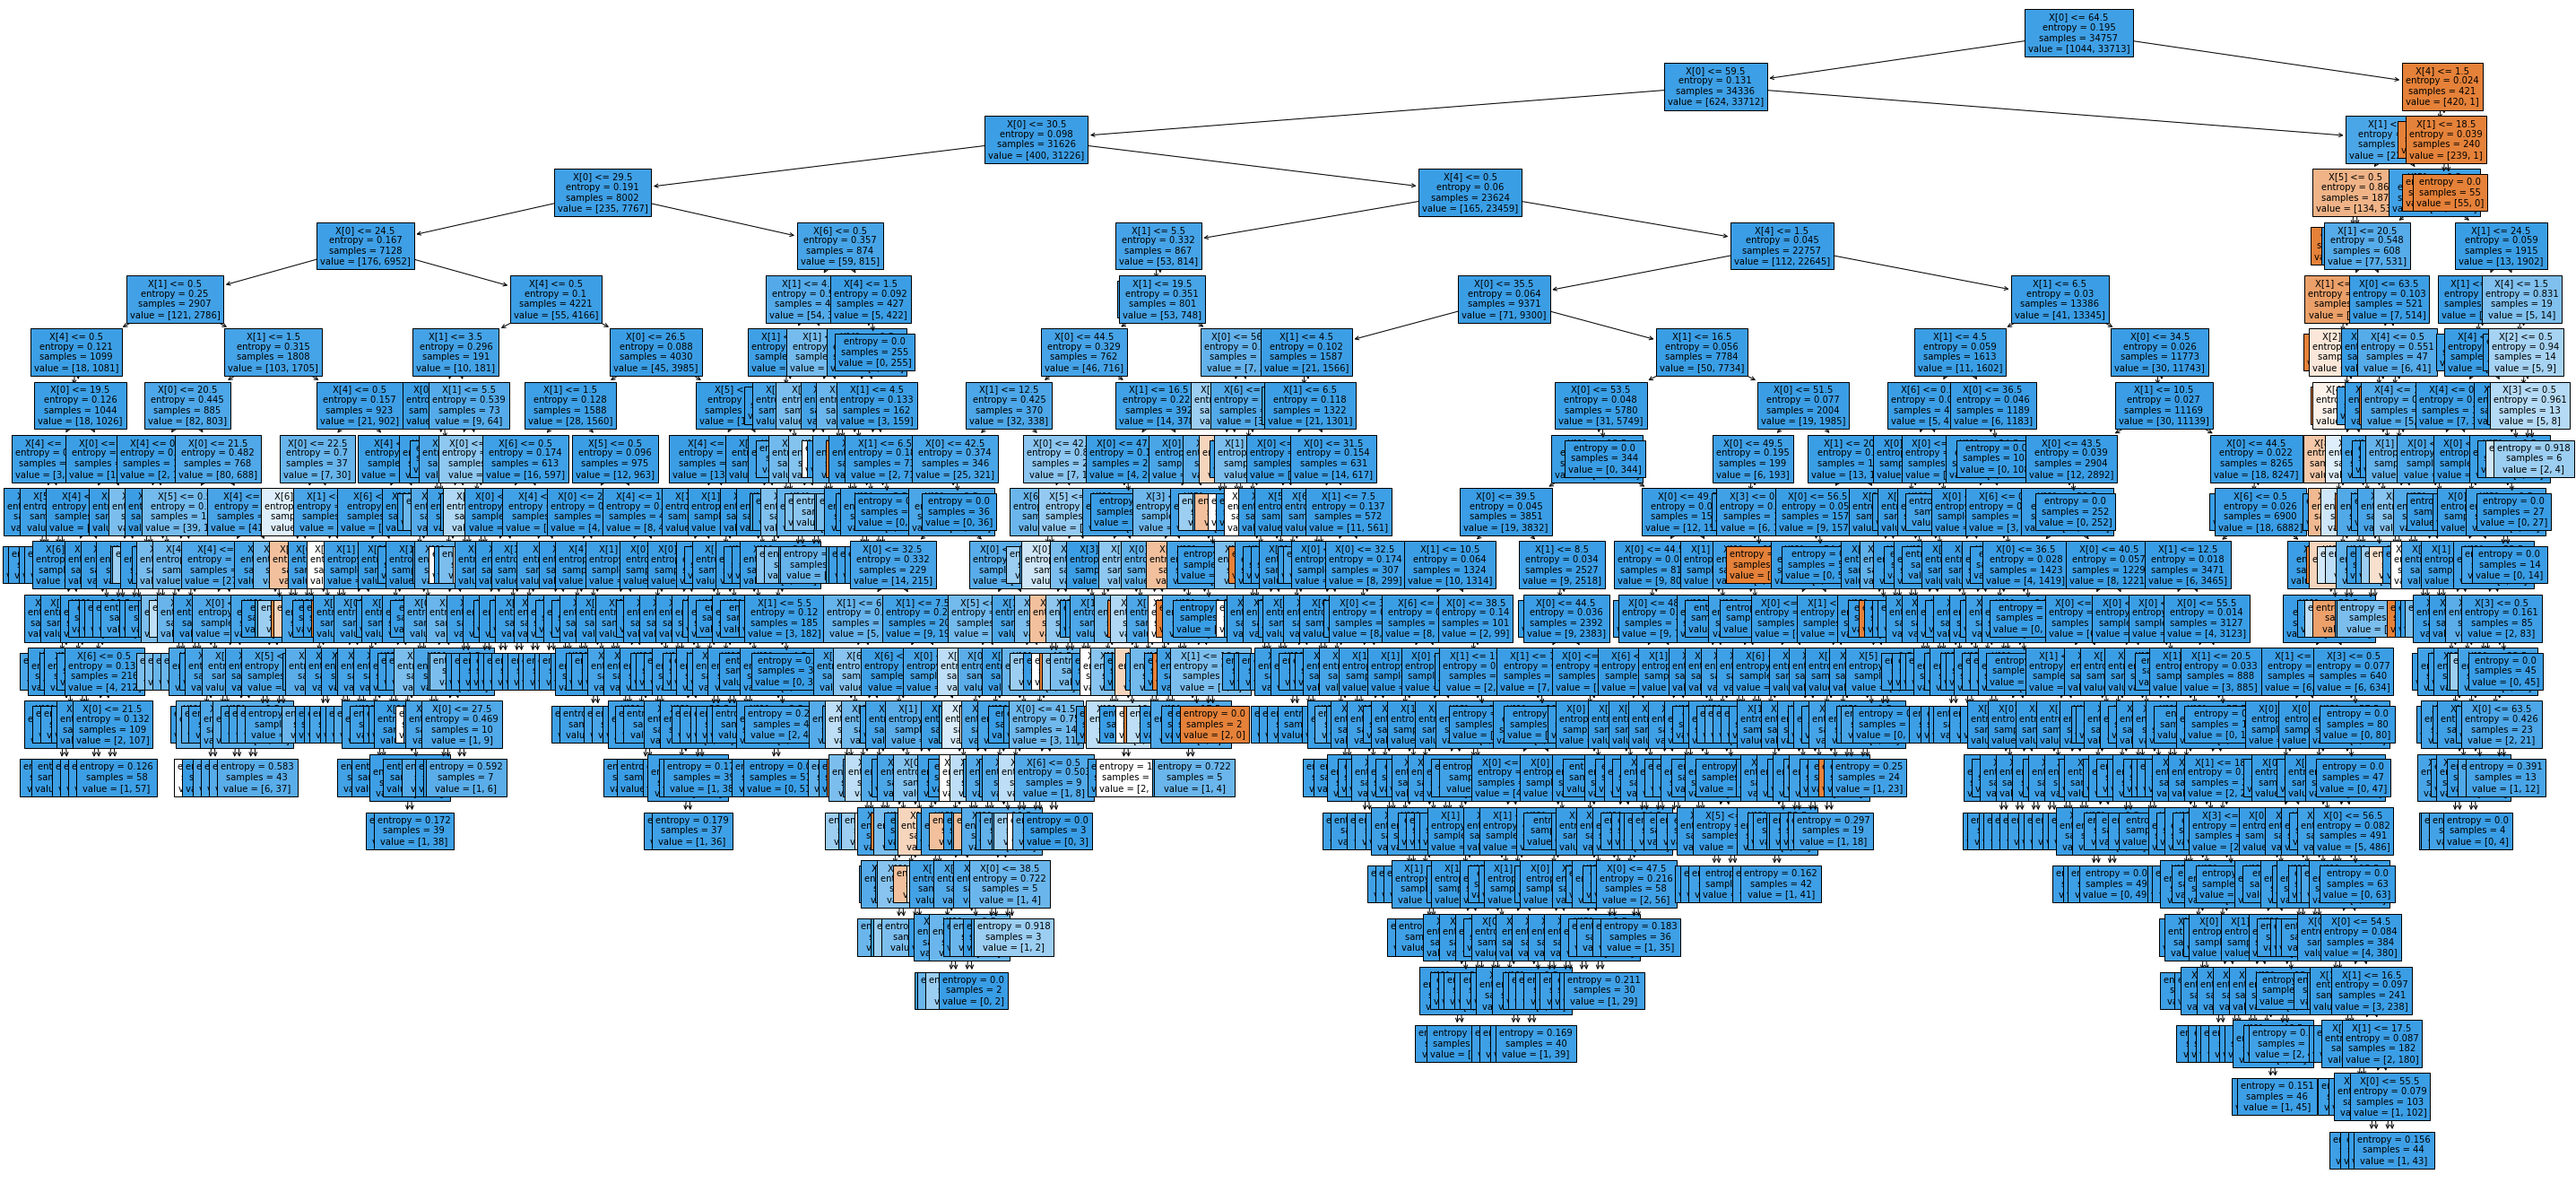

In [44]:
# Vẽ cây Decision Tree (ID3)
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree_id3',dpi=100)
plt.show()

In [45]:
clf1 = tree.DecisionTreeClassifier(criterion="gini", random_state=0)

start_cart = time.time()
cart_pred = clf1.fit(X_train, y_train).predict(X_test)
end_cart = time.time()
times_tree_cart = timedelta(seconds=round(end_cart - start_cart,4)).total_seconds()
print("Time decision tree (CART)",times_tree_cart)
cart_score = metrics.accuracy_score(y_test, cart_pred)
accuracy_tree_cart = cart_score
print("Accuracy",accuracy_tree_cart)
print("Report",metrics.classification_report(y_test,cart_pred))

Time decision tree (CART) 0.0329
Accuracy 0.9856337271750806
Report               precision    recall  f1-score   support

           0       0.88      0.59      0.71       441
           1       0.99      1.00      0.99     14455

    accuracy                           0.99     14896
   macro avg       0.93      0.80      0.85     14896
weighted avg       0.98      0.99      0.98     14896



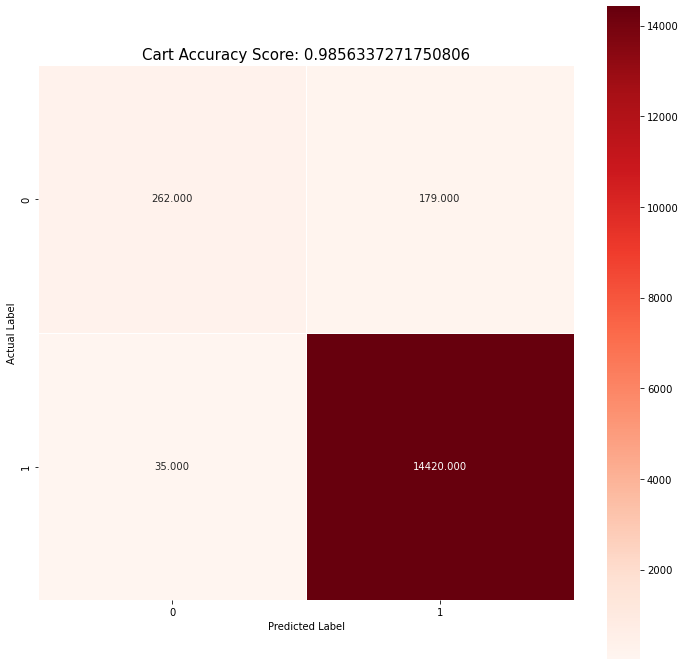

In [46]:
# Vẽ ma trận nhầm lẫn cho thuật toán Decision Tree (CART)
cart_cm = metrics.confusion_matrix(y_test, cart_pred)
plt.figure(figsize=(12,12))
ax=sns.heatmap(cart_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Reds')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
title = 'Cart Accuracy Score: {0}'.format(cart_score)
plt.title(title,size=15)
plt.show()

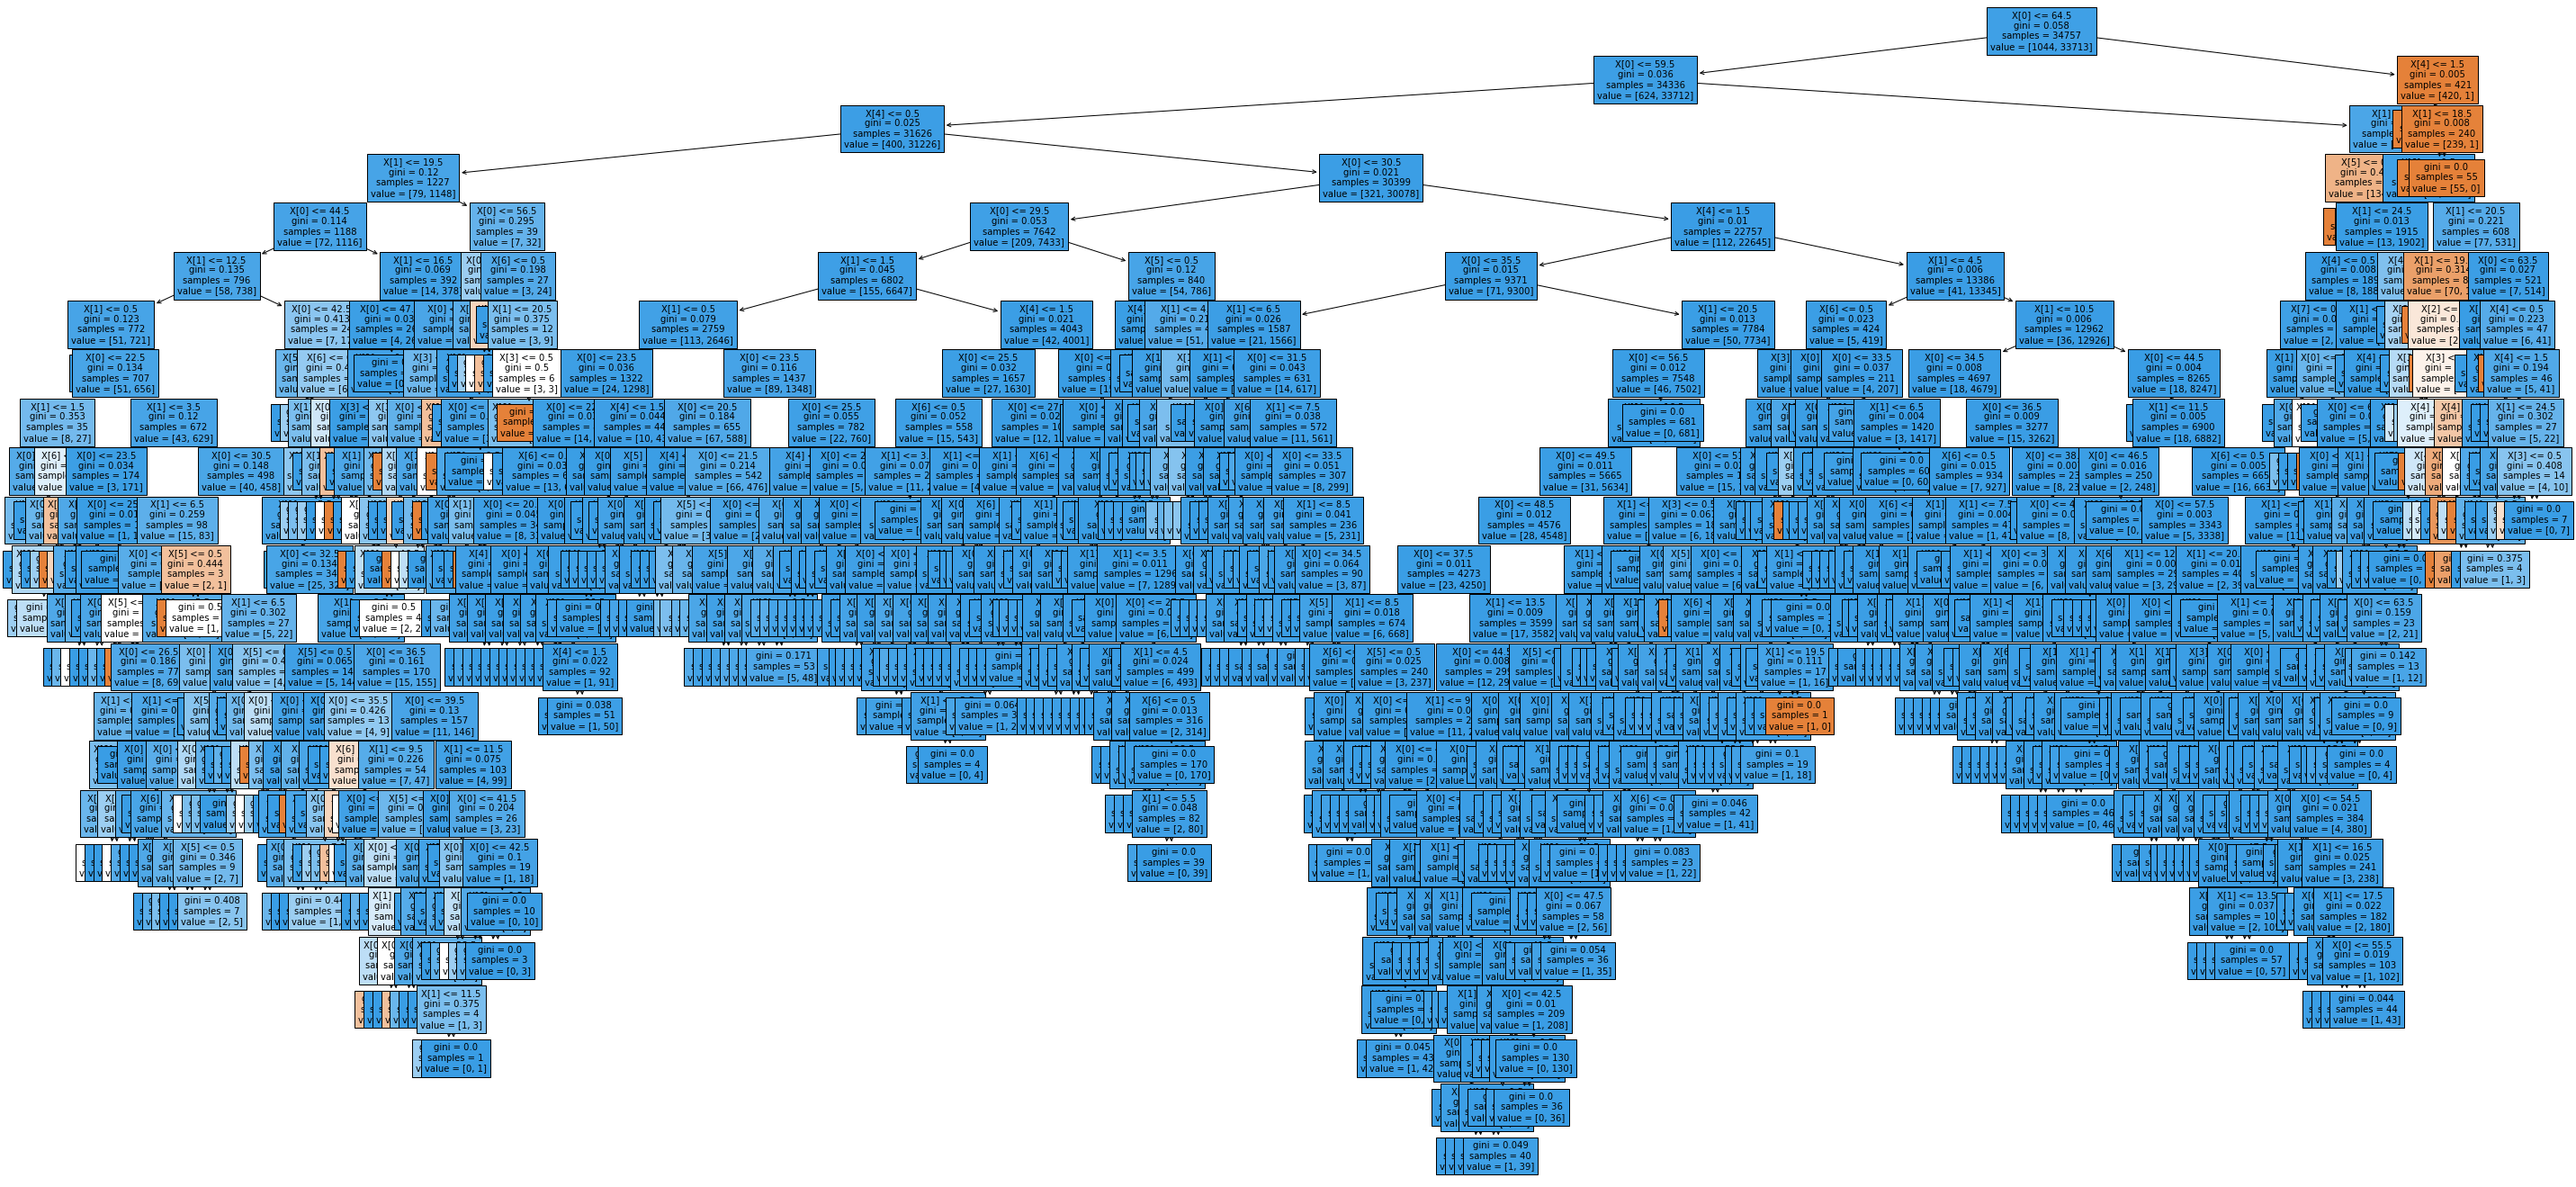

In [47]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf1,filled=True,fontsize=10)
plt.savefig('decision_tree_cart',dpi=100)
plt.show()

In [48]:
# Thực hiện thuật toán Naive Bayes 
nv = GaussianNB()
start_nv = time.time()
nv_pred = nv.fit(X_train, y_train).predict(X_test)
end_nv = time.time()
times_nv = timedelta(seconds=round(end_nv - start_nv,4)).total_seconds()
print("Time Naive Bayes",times_nv)
nv_score = metrics.accuracy_score(y_test, nv_pred)
accuracy_nv = nv_score
print("Accuracy",accuracy_nv)
print("Report",metrics.classification_report(y_test,nv_pred))

Time Naive Bayes 0.013
Accuracy 0.9370972073039742
Report               precision    recall  f1-score   support

           0       0.09      0.12      0.10       441
           1       0.97      0.96      0.97     14455

    accuracy                           0.94     14896
   macro avg       0.53      0.54      0.54     14896
weighted avg       0.95      0.94      0.94     14896



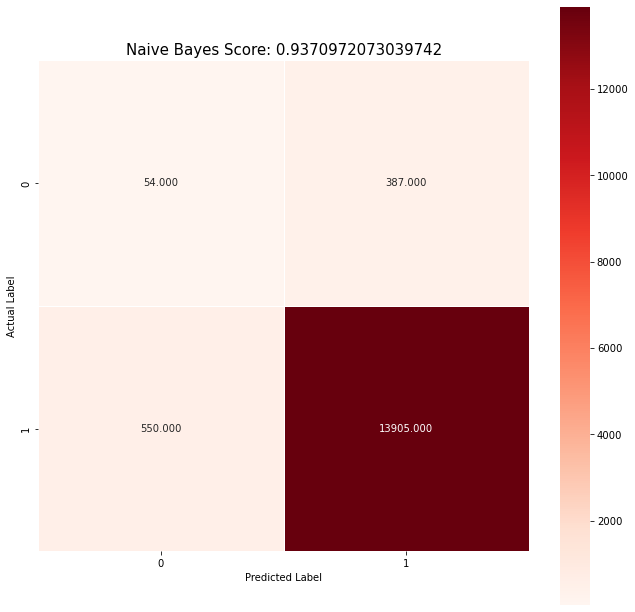

In [49]:
# Vẽ ma trận nhầm lẫn cho thuật toán Naive Bayes
nv_cm = metrics.confusion_matrix(y_test, nv_pred)
plt.figure(figsize=(11,11))
ax=sns.heatmap(nv_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Reds')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
title = 'Naive Bayes Score: {0}'.format(nv_score)
plt.title(title,size=15)
plt.show()

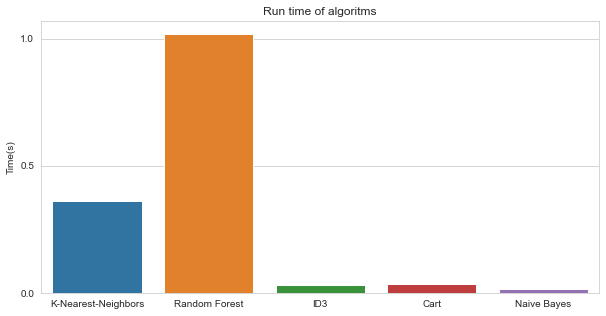

In [50]:
colors = ['blue', 'green', 'red', 'bwr', 'purple']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,6,0.5))
plt.ylabel('Time(s)')
plt.title('Run time of algoritms')
sns.barplot(x=list(['K-Nearest-Neighbors','Random Forest','ID3','Cart','Naive Bayes']), y= list([times_knn, times_rf, times_tree_id3, times_tree_cart, times_nv]))
plt.show()

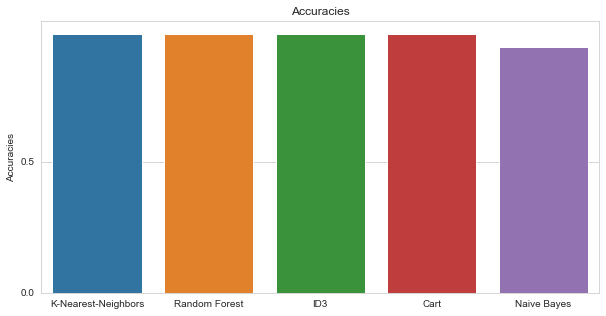

In [51]:
colors = ['blue', 'green', 'red', 'bwr', 'purple']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,1,0.5))
plt.ylabel('Accuracies')
plt.title('Accuracies')
sns.barplot(x=list(['K-Nearest-Neighbors','Random Forest','ID3','Cart','Naive Bayes']), y= list([accuracy_knn, accuracy_rf, accuracy_tree_id3, accuracy_tree_cart, accuracy_nv]))
plt.show()

In [52]:
import tkinter as tk
from tkinter import *
from  tkinter import ttk

X1 = df[['age', 'length_of_service','hierarchy_job','population_category','department_service_Customer']]

X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X1,label,test_size=0.3,random_state=0)
clf1 = RandomForestClassifier()
clf1.fit(X_train_1,y_train_1)
y_pred = clf1.predict(X_test_1)

# tkinter GUI
root= tk.Tk()
root.title('Employee Termination Prediction')
canvas1 = tk.Canvas(root, width = 500, height = 350)
canvas1.pack()

# Age
label1 = tk.Label(root, text='Age  :')
canvas1.create_window(80, 100, window=label1)

entry1 = tk.Entry(root)
canvas1.create_window(270, 100, window=entry1)

# Length of service
label2 = tk.Label(root, text='Length of service  :')
canvas1.create_window(114, 120, window=label2) 

entry2 = tk.Entry(root)
canvas1.create_window(270, 120, window=entry2)

# Hierarchy job
label3 = tk.Label(root, text='Hierarchy job  : ')
canvas1.create_window(105, 140, window=label3)

entry3 = tk.Entry(root)
canvas1.create_window(270, 140, window=entry3)

# Population category
label4 = tk.Label(root, text='Population category  :')
canvas1.create_window(122, 160, window=label4)

entry4 = tk.Entry(root)
canvas1.create_window(270, 160, window=entry4)

# serve_cus
label5 = tk.Label(root, text='Service Customer  :')
canvas1.create_window(113, 180, window=label5)

entry5 = tk.Entry(root)
canvas1.create_window(270, 180, window=entry5)

# Tạo biến nhận giá trị nhập vào
def values(): 
    global ag
    ag = float(entry1.get()) 
    
    global los
    los = float(entry2.get()) 
    
    global hj
    hj = float(entry3.get()) 
    
    global pc
    pc = float(entry4.get())
    
    global sc
    sc = float(entry5.get())
# Dự đoán và xuất ra kết quả
    Prediction_result = clf1.predict([[los,ag,hj,pc,sc]])
    if Prediction_result == 0:
        Prediction_output = 'The employee WILL leave company'
    else:
        Prediction_output = 'The employee WONT leave company'
    label_Prediction = tk.Label(root, text = Prediction_output, bg='yellow',font = 20)
    canvas1.create_window(270, 280, window = label_Prediction)
    
button1 = tk.Button (root, text = 'Predict',command = values, bg ='sky blue', fg ='black', font = 20)
canvas1.create_window(270, 220, window = button1)
root.mainloop()